In [4]:
using CellBasedModels
using GLMakie

In [78]:
model = ABM(3,

    model = Dict(
        :rRep => Float64,
        :fRep => Float64,
        :rAtr => Float64,
        :fAtr => Matrix{Float64},
        :D => Float64
    ),

    agent = Dict(
        :fate => Int 
    ),

    agentODE = quote
    
        fx = 0.
        fy = 0.
        fz = 0.
        @loopOverNeighbors i2 begin
            d = CBMMetrics.euclidean(x,x[i2],y,y[i2],z,z[i2])
            dirx = (x-x[i2])/d
            diry = (y-y[i2])/d
            dirz = (z-z[i2])/d
            if d < rRep #Repulsion forces
                fx += fRep*(rRep-d)*dirx  
                fy += fRep*(rRep-d)*diry  
                fz += fRep*(rRep-d)*dirz
            elseif d < rAtr #Attraction forces
                fx += -fAtr[fate,fate[i2]]*(rAtr-d)*dirx  
                fy += -fAtr[fate,fate[i2]]*(rAtr-d)*diry  
                fz += -fAtr[fate,fate[i2]]*(rAtr-d)*dirz  
            end
        end
    
        dt(x) = fx
        dt(y) = fy
        dt(z) = fz

    end,

    agentSDE = quote
    
        dt(x) = D
        dt(y) = D
        dt(z) = D

    end,

    agentAlg = CBMIntegrators.EM()

);

In [88]:
f(x) = sqrt((x[1])^2+(x[2])^2+(x[3])^2)<4
x,y,z = CellBasedModels.CBMUtils.initializeSpheres([-20 20;-20 20;-20 20],.5;fExtrude=f)

com = Community(model, N=length(x), dt=0.1, simBox=[-20 20;-20 20;-20 20])

s = length(x)
com.x .= x.+ .5 .*(rand().-.5)
com.y .= y.+ .5 .*(rand().-.5)
com.z .= z.+ .5 .*(rand().-.5)
com.fate = rand([1 2], s)
com.rRep = 0.5
com.fRep = 3
com.rAtr = 0.6
com.fAtr = [1 .2;.2 1]
com.D = .005

0.005

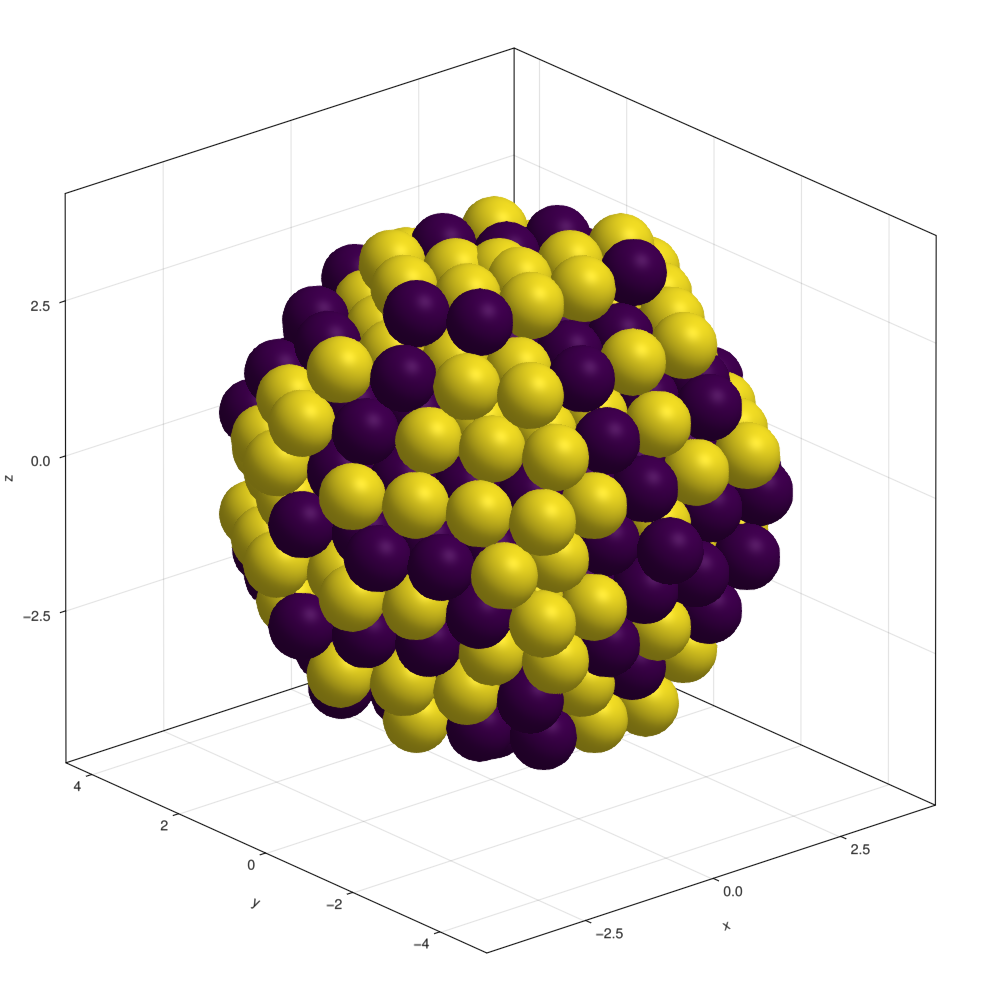

In [89]:
fig = Figure(size=(1000,1000))

ax = Axis3(fig[1,1], aspect=:data)

meshscatter!(ax, com.x,com.y,com.z, color=com.fate, markersize=.5)

fig

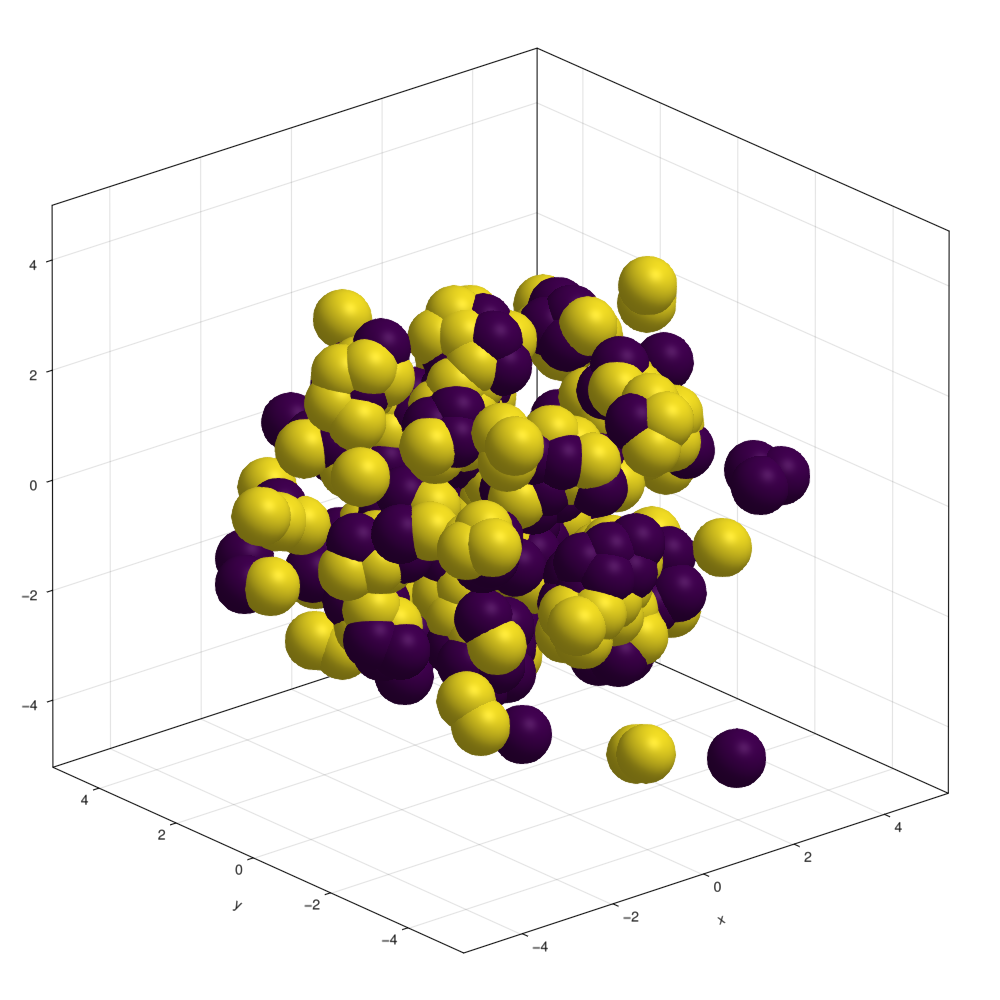

In [90]:
evolve!(com, steps=200000, saveEach=200000)

fig = Figure(size=(1000,1000))

ax = Axis3(fig[1,1], aspect=:data)

meshscatter!(ax, com.x,com.y,com.z, color=com.fate, markersize=.5)

fig